Here, we intend to produce some simple theoretical HI power spectra, using CAMB. This is to enable comparison with the power spectra calculated from the simulation directly.

In [55]:
import camb
from camb import model, sources
import numpy as np
import matplotlib.pyplot as plt

In [57]:
redshift=4.5

pars =  camb.set_params(H0=67.66, ombh2=0.04897468161869667*0.6766**2, omch2=(0.30964144154550644-0.04897468161869667)*0.6766**2, ns=1)
pars.set_matter_power(redshifts=[redshift], kmax=81)
#HI = sources.GaussianSourceWindow(source_type="21cm")

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=0.026, maxkh=81, npoints = 100)
s8 = np.array(results.get_sigma8())

results.calc_power_spectra()

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=0.026, maxkh=81, npoints = 100)

In [64]:
import postEoR.observations as obs
from scipy.interpolate import make_interp_spline

bias = 2.5

mean_BT = 0.0006274858508004773

camb_BT = pk_nonlin[0,:] * bias**2 * mean_BT**2

AA4 = obs.SKA1LOW_AA4(0)
AAstar = obs.SKA1LOW_AAstar(0)

some_survey = obs.Interferometer(AA4, 6, 3, 10, 5000, 0, 10e6)
comp_survey = obs.Interferometer(AAstar, 6, 3, 10, 5000, 0, 10e6)


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


15.895018939634568
15.986399648547998


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


10000000.0
10000000.0


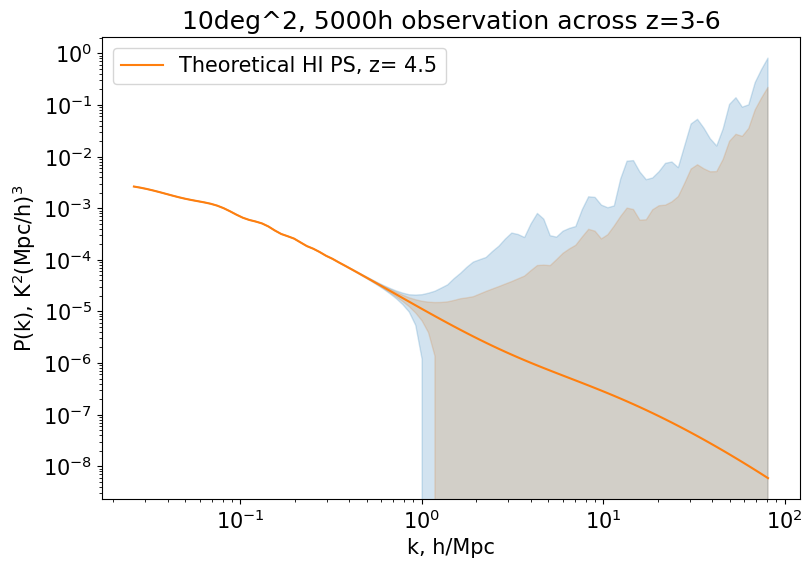

In [65]:
from scipy.interpolate import make_smoothing_spline

kbins=np.geomspace(0.026, 81, 100)

#BT_k, BT_ps, err= box.get_PS(norm=False, save_fig=False, kbins=kbins)

#smoothed = make_smoothing_spline(BT_k, BT_ps)

#plt.plot(BT_k, smoothed(BT_k), linestyle="--", color="tab:orange", label="Smoothed sim")
#plt.errorbar(BT_k, smoothed(BT_k), err, ecolor="tab:orange", color="tab:orange", linestyle="--", label="Smoothed sim")

BT_k = kh_nonlin
BT_ps = camb_BT

plt.rcParams['figure.figsize'] = [9, 6]

plt.plot(BT_k, BT_ps, color="tab:orange", label="Theoretical HI PS, z= " + str(redshift))
ps, k_perp = some_survey.noise_power_perp(redshift)
noise = make_interp_spline(k_perp, ps, k=1)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:orange")
ps, k_perp = comp_survey.noise_power_perp(redshift)
noise = make_interp_spline(k_perp, ps, k=1)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:blue")
plt.ylabel("P(k), K$^2$(Mpc/h)$^3$")
plt.xlabel("k, h/Mpc")
plt.title("10deg^2, 5000h observation across z=3-6")
plt.yscale("log")
plt.xscale("log")
plt.legend()